In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


#### IMPORTS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#tree ensembles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### LOADING THE DATASET

In [3]:
data = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
data.shape

(918, 12)

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### ONE HOT ENCODING OF CATEGORICAL COLUMNS

In [5]:
category_names = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

In [6]:
data = pd.get_dummies(data, prefix=category_names, columns=category_names, dtype=float)

In [7]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


#### TRAIN AND VALIDATION DATASET SPLIT

In [8]:
x_cols = [x for x in data.columns if x!= "HeartDisease"]
x_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [9]:
train_x, val_x, train_y, val_y = train_test_split(data[x_cols], data["HeartDisease"], test_size=0.2, random_state=55)

print("Train x:",train_x.shape)
print("Train y:",train_y.shape)

print("Validation x:",val_x.shape)
print("Validation y:",val_y.shape)

Train x: (734, 20)
Train y: (734,)
Validation x: (184, 20)
Validation y: (184,)


### MODELING

#### DECISION TREE

In [10]:
depth = [1,2,3,4,5,6,7,8,10]
sample = [2,10, 30, 50, 100, 200, 300, 700]

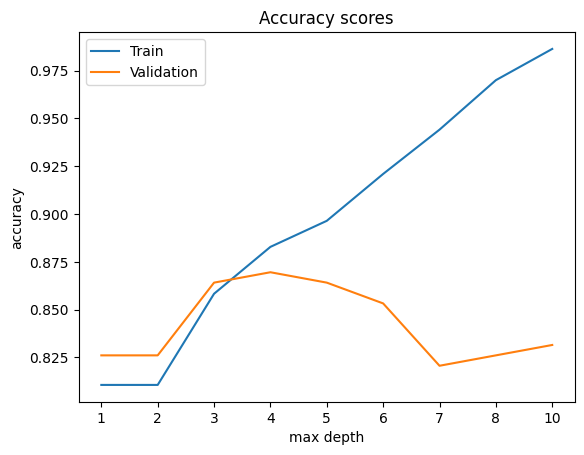

In [11]:
# tuning the max_depth parameter

accuracy_list_t = []
accuracy_list_v = []

for d in depth:
    tree_model = DecisionTreeClassifier(random_state=50, max_depth=d)
    tree_model.fit(train_x,train_y)
    #predicting train data
    y_pred_train = tree_model.predict(train_x)
    accuracy_train = accuracy_score(train_y,y_pred_train)
    # predicting val data
    y_pred_val = tree_model.predict(val_x)
    accuracy_val = accuracy_score(val_y,y_pred_val)
    accuracy_list_t.append(accuracy_train)
    accuracy_list_v.append(accuracy_val)

plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.title("Accuracy scores")
plt.xticks(ticks=range(len(depth)), labels=depth) #ticks:location, labels:labels @ given x tick location
plt.plot(accuracy_list_t)
plt.plot(accuracy_list_v)
plt.legend(["Train","Validation"])

 - As the depth of the tree increases, the training accuracy reaches 1 while validation accuracy reduces - model is overfitting    
 - When the tree depth is < 3, both training and accuracy score drops.  
 - Validation score is highest when max depth = 4

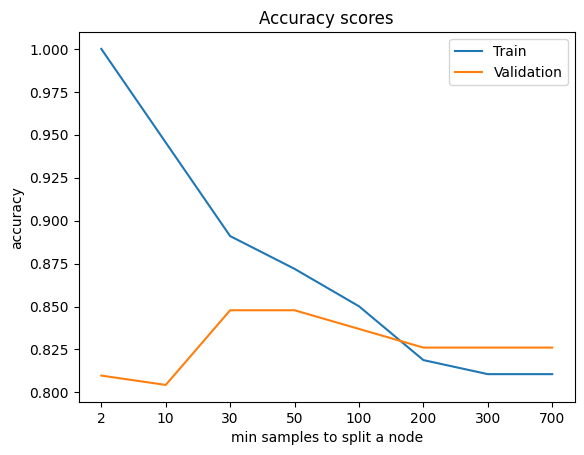

In [12]:
# tuning the min_samples_split parameter

accuracy_list_t = []
accuracy_list_v = []

for s in sample:
    tree_model = DecisionTreeClassifier(random_state=50, min_samples_split=s)
    tree_model.fit(train_x,train_y)
    #predicting train data
    y_pred_train = tree_model.predict(train_x)
    accuracy_train = accuracy_score(train_y,y_pred_train)
    # predicting val data
    y_pred_val = tree_model.predict(val_x)
    accuracy_val = accuracy_score(val_y,y_pred_val)
    accuracy_list_t.append(accuracy_train)
    accuracy_list_v.append(accuracy_val)

plt.xlabel("min samples to split a node")
plt.ylabel("accuracy")
plt.title("Accuracy scores")
plt.xticks(ticks=range(len(sample)), labels=sample) #ticks:location, labels:labels @ given x tick location
plt.plot(accuracy_list_t)
plt.plot(accuracy_list_v)
plt.legend(["Train","Validation"])


 - As the min samples count increases, overfitting is reduced
 - There is a case of overfitting when the sample sizes are too low. <30
 - Between 30 to 50, training and validation accuracy comes closer 

In [13]:
# Final decision tree model

tree_model = DecisionTreeClassifier(random_state=50, max_depth=4, min_samples_split=50)
tree_model.fit(train_x,train_y)
accuracy_train = accuracy_score(train_y, tree_model.predict(train_x))
accuracy_val = accuracy_score(val_y, tree_model.predict(val_x))

print(f"Metrics train:\n\tAccuracy score:{accuracy_train:.3f}")
print(f"Metrics Validation:\n\tAccuracy score:{accuracy_val:.3f}")

Metrics train:
	Accuracy score:0.866
Metrics Validation:
	Accuracy score:0.870


#### RANDOM FOREST

In [14]:
depth = [2,4,8,16,32,64]
sample = [2,10, 30, 50, 100, 200, 300, 700]
n_estimates = [10,50,100,200]

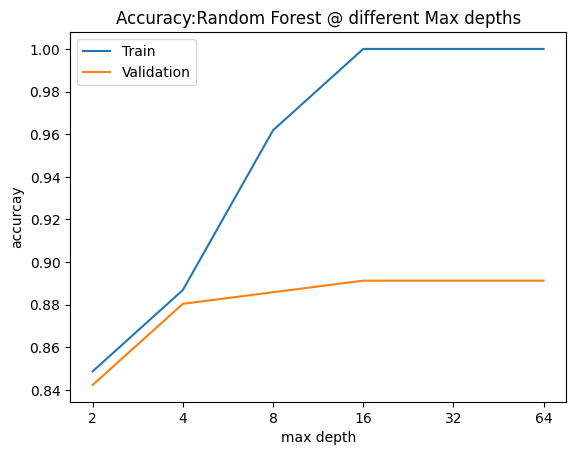

In [15]:
# tuning the max depth parameter
accuracy_list_t = []
accuracy_list_v = []

for d in depth:
    rf_model = RandomForestClassifier(max_depth=d, random_state=55)
    rf_model.fit(train_x,train_y)
    accuracy_train = accuracy_score(train_y,rf_model.predict(train_x))
    accuracy_val = accuracy_score(val_y,rf_model.predict(val_x))
    accuracy_list_t.append(accuracy_train)
    accuracy_list_v.append(accuracy_val)

plt.xlabel("max depth")
plt.ylabel("accurcay")
plt.title("Accuracy:Random Forest @ different Max depths")
plt.xticks(ticks=range(len(depth)), labels = depth)
plt.plot(accuracy_list_t)
plt.plot(accuracy_list_v)
plt.legend(["Train","Validation"])

 - As the depth size increases, overfitting occurs
 - At depth = 4, validation accuracy is highest

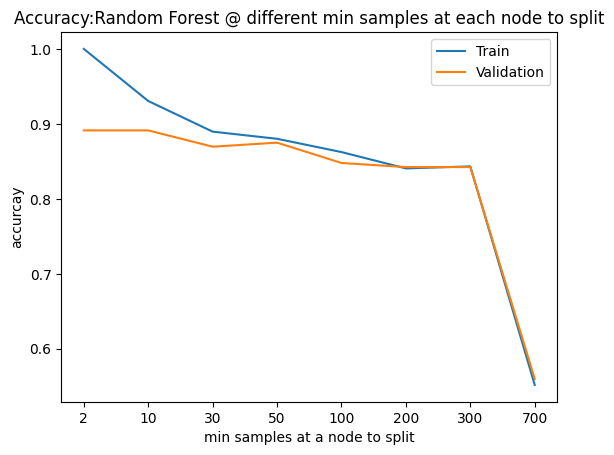

In [16]:
# tuning the min sample size at each node to split parameter
accuracy_list_t = []
accuracy_list_v = []

for s in sample:
    rf_model = RandomForestClassifier(min_samples_split=s, random_state=55)
    rf_model.fit(train_x,train_y)
    accuracy_train = accuracy_score(train_y,rf_model.predict(train_x))
    accuracy_val = accuracy_score(val_y,rf_model.predict(val_x))
    accuracy_list_t.append(accuracy_train)
    accuracy_list_v.append(accuracy_val)

plt.xlabel("min samples at a node to split")
plt.ylabel("accurcay")
plt.title("Accuracy:Random Forest @ different min samples at each node to split")
plt.xticks(ticks=range(len(sample)), labels = sample)
plt.plot(accuracy_list_t)
plt.plot(accuracy_list_v)
plt.legend(["Train","Validation"])

 - As the min samples required at each node to split increases accuracy of the model drops
 - At 10, validation accuracy is highest and training accuracy is closer to validation. 

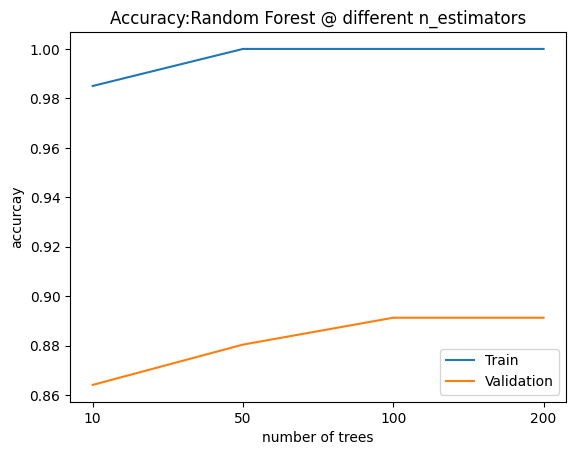

In [17]:
# tuning the n_estimators parameter
# n_estimators : the number of Decision Trees that make up the Random Forest.

accuracy_list_t = []
accuracy_list_v = []

for n in n_estimates:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=55)
    rf_model.fit(train_x,train_y)
    accuracy_train = accuracy_score(train_y,rf_model.predict(train_x))
    accuracy_val = accuracy_score(val_y,rf_model.predict(val_x))
    accuracy_list_t.append(accuracy_train)
    accuracy_list_v.append(accuracy_val)

plt.xlabel("number of trees")
plt.ylabel("accurcay")
plt.title("Accuracy:Random Forest @ different n_estimators")
plt.xticks(ticks=range(len(n_estimates)), labels = n_estimates)
plt.plot(accuracy_list_t)
plt.plot(accuracy_list_v)
plt.legend(["Train","Validation"])

fitting a random forest with the following parameters:

 - max_depth: 16
 - min_samples_split: 10
 - n_estimators: 100

In [18]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 16, 
                                             min_samples_split = 10).fit(train_x,train_y)


In [19]:
print(f"Random Forest\nMetrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(train_x),train_y):.4f}")
print(f"\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(val_x),val_y):.4f}")

Random Forest
Metrics train:
	Accuracy score: 0.9319

Metrics test:
	Accuracy score: 0.8967


**NOTE**
- we can use **max_features** parameter for random selection of a subset of the features